In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
# import pro-football-reference fantasy data
data2020 = pd.read_csv("Data/data2020.txt")
data2019 = pd.read_csv("Data/data2019.txt")
data2018 = pd.read_csv("Data/data2018.txt")

In [3]:
# fill NaNs, add season columns, drop player IDs from "Player" column
data2020 = data2020.fillna(0)
data2020["Season"] = 2020
data2020["Player"] = data2020["Player"].str.split("*",n=1,expand=True)[0]
data2020["Player"] = data2020["Player"].str.split("\\",n=1,expand=True)[0]

data2019 = data2019.fillna(0)
data2019["Season"] = 2019
data2019["Player"] = data2019["Player"].str.split("*",n=1,expand=True)[0]
data2019["Player"] = data2019["Player"].str.split("\\",n=1,expand=True)[0]

data2018 = data2018.fillna(0)
data2018["Season"] = 2018
data2018["Player"] = data2018["Player"].str.split("*",n=1,expand=True)[0]
data2018["Player"] = data2018["Player"].str.split("\\",n=1,expand=True)[0]
data2020

,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,...,2PM,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank,Season
0,1,Derrick Henry,TEN,RB,26,16,16,0,0,0,...,1.0,0.0,314.0,333.1,341.1,323.6,184.0,1,1.0,2020
1,2,Alvin Kamara,NOR,RB,25,15,10,0,0,0,...,0.0,0.0,295.0,377.8,383.8,336.3,165.0,2,2.0,2020
2,3,Dalvin Cook,MIN,RB,25,14,14,0,0,0,...,3.0,0.0,294.0,337.8,346.8,315.8,164.0,3,3.0,2020
3,4,Davante Adams,GNB,WR,28,14,14,0,0,0,...,0.0,0.0,243.0,358.4,362.4,300.9,117.0,1,4.0,2020
4,5,Travis Kelce,KAN,TE,31,15,15,1,2,4,...,1.0,0.0,208.0,312.8,316.8,260.3,117.0,1,5.0,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,622,Andre Roberts,BUF,WR,32,15,0,0,0,0,...,0.0,0.0,-1.0,3.1,5.1,1.1,0.0,243,0.0,2020
622,623,Nate Sudfeld,PHI,QB,27,1,0,5,12,32,...,0.0,0.0,-2.0,-1.5,0.5,-0.5,0.0,83,0.0,2020
623,624,Nsimba Webster,LAR,0,24,16,0,0,0,0,...,0.0,0.0,-2.0,-2.0,-1.0,-2.0,0.0,246,0.0,2020
624,625,Dede Westbrook,JAX,WR,27,2,0,0,0,0,...,0.0,0.0,-2.0,-0.6,0.4,-1.1,0.0,245,0.0,2020


In [4]:
data2019

,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,...,2PM,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank,Season
0,1,Christian McCaffrey,CAR,RB,23,16,16,0,2,0,...,1.0,0.0,355.0,471.2,477.2,413.2,215.0,1,1.0,2019
1,2,Lamar Jackson,BAL,QB,22,15,15,265,401,3127,...,0.0,0.0,416.0,415.7,429.7,421.7,152.0,1,2.0,2019
2,3,Derrick Henry,TEN,RB,25,15,15,0,0,0,...,0.0,0.0,277.0,294.6,303.6,285.6,136.0,2,3.0,2019
3,4,Aaron Jones,GNB,RB,25,16,16,0,0,0,...,0.0,0.0,266.0,314.8,322.8,290.3,125.0,3,4.0,2019
4,5,Ezekiel Elliott,DAL,RB,24,16,16,0,0,0,...,0.0,0.0,258.0,311.7,319.7,284.7,117.0,4,5.0,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614,615,Ray-Ray McCloud,CAR,0,23,6,0,0,0,0,...,0.0,0.0,-2.0,-2.0,-1.0,-2.0,0.0,244,0.0,2019
615,616,Darrius Shepherd,GNB,WR,24,6,0,0,0,0,...,0.0,0.0,-2.0,-0.9,0.1,-1.4,0.0,242,0.0,2019
616,617,Jarrett Stidham,NWE,QB,23,3,0,2,4,14,...,0.0,0.0,-2.0,-1.6,-0.6,-0.6,0.0,73,0.0,2019
617,618,Michael Walker,JAX,WR,23,7,0,0,0,0,...,0.0,0.0,-3.0,-0.5,1.5,-1.5,0.0,246,0.0,2019


In [5]:
data2018

,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,...,2PM,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank,Season
0,1,Todd Gurley,LAR,RB,24,14,14,0,0,0,...,3.0,0.0,313.0,372.1,379.1,342.6,178.0,1,1.0,2018
1,2,Saquon Barkley,NYG,RB,21,16,16,0,0,0,...,1.0,0.0,295.0,385.8,391.8,340.3,159.0,2,2.0,2018
2,3,Christian McCaffrey,CAR,RB,22,16,16,1,1,50,...,0.0,0.0,279.0,385.5,392.5,332.0,143.0,3,3.0,2018
3,4,Alvin Kamara,NOR,RB,23,15,13,0,0,0,...,3.0,0.0,273.0,354.2,360.2,313.7,138.0,4,4.0,2018
4,5,Patrick Mahomes,KAN,QB,23,16,16,383,580,5097,...,1.0,0.0,417.0,417.1,437.1,429.1,134.0,1,5.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,604,Kaelin Clay,NYG,0,26,2,0,0,0,0,...,0.0,0.0,-2.0,-2.0,-1.0,-2.0,0.0,242,0.0,2018
604,605,JJ Jones,2TM,WR,26,4,0,0,0,0,...,0.0,0.0,-2.0,-0.7,0.3,-1.2,0.0,239,0.0,2018
605,606,Kyle Lauletta,NYG,QB,23,2,0,0,5,0,...,0.0,0.0,-2.0,-2.2,-1.2,-1.2,0.0,75,0.0,2018
606,607,Riley McCarron,NWE,0,25,1,0,0,0,0,...,0.0,0.0,-2.0,-2.0,-1.0,-2.0,0.0,241,0.0,2018


In [6]:
# merge the 3 dataframes
data1 = pd.merge(data2020, data2019, how="outer")
data = pd.merge(data1, data2018, how="outer")
data

,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,...,2PM,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank,Season
0,1,Derrick Henry,TEN,RB,26,16,16,0,0,0,...,1.0,0.0,314.0,333.1,341.1,323.6,184.0,1,1.0,2020
1,2,Alvin Kamara,NOR,RB,25,15,10,0,0,0,...,0.0,0.0,295.0,377.8,383.8,336.3,165.0,2,2.0,2020
2,3,Dalvin Cook,MIN,RB,25,14,14,0,0,0,...,3.0,0.0,294.0,337.8,346.8,315.8,164.0,3,3.0,2020
3,4,Davante Adams,GNB,WR,28,14,14,0,0,0,...,0.0,0.0,243.0,358.4,362.4,300.9,117.0,1,4.0,2020
4,5,Travis Kelce,KAN,TE,31,15,15,1,2,4,...,1.0,0.0,208.0,312.8,316.8,260.3,117.0,1,5.0,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1848,604,Kaelin Clay,NYG,0,26,2,0,0,0,0,...,0.0,0.0,-2.0,-2.0,-1.0,-2.0,0.0,242,0.0,2018
1849,605,JJ Jones,2TM,WR,26,4,0,0,0,0,...,0.0,0.0,-2.0,-0.7,0.3,-1.2,0.0,239,0.0,2018
1850,606,Kyle Lauletta,NYG,QB,23,2,0,0,5,0,...,0.0,0.0,-2.0,-2.2,-1.2,-1.2,0.0,75,0.0,2018
1851,607,Riley McCarron,NWE,0,25,1,0,0,0,0,...,0.0,0.0,-2.0,-2.0,-1.0,-2.0,0.0,241,0.0,2018


In [7]:
# # groupby positions *not too useful*
# pos_df = data2020.groupby("FantPos")

# pos_players = pos_df["Player"].nunique()
# pos_players

In [8]:
# Create dataframes of main positions
qb20 = data2020.loc[data2020["FantPos"] == "QB",]
qb19 = data2019.loc[data2019["FantPos"] == "QB",]
qb18 = data2018.loc[data2018["FantPos"] == "QB",]

rb20 = data2020.loc[data2020["FantPos"] == "RB",]
rb19 = data2019.loc[data2019["FantPos"] == "RB",]
rb18 = data2018.loc[data2018["FantPos"] == "RB",]

wr20 = data2020.loc[data2020["FantPos"] == "WR",]
wr19 = data2019.loc[data2019["FantPos"] == "WR",]
wr18 = data2018.loc[data2018["FantPos"] == "WR",]

te20 = data2020.loc[data2020["FantPos"] == "TE",]
te19 = data2019.loc[data2019["FantPos"] == "TE",]
te18 = data2018.loc[data2018["FantPos"] == "TE",]

In [9]:
qb20.columns

Index(['Rk', 'Player', 'Tm', 'FantPos', 'Age', 'G', 'GS', 'Cmp', 'Att', 'Yds',
       'TD', 'Int', 'Att.1', 'Yds.1', 'Y/A', 'TD.1', 'Tgt', 'Rec', 'Yds.2',
       'Y/R', 'TD.2', 'Fmb', 'FL', 'TD.3', '2PM', '2PP', 'FantPt', 'PPR',
       'DKPt', 'FDPt', 'VBD', 'PosRank', 'OvRank', 'Season'],
      dtype='object')

In [10]:
# merge quarterbacks dataframes
qb1 = pd.merge(qb20, qb19, how="outer")
qb = pd.merge(qb1, qb18, how="outer")
qb

,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,...,2PM,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank,Season
0,7,Josh Allen,BUF,QB,24,16,16,396,572,4544,...,0.0,0.0,395.0,396.1,418.1,405.6,113.0,1,7.0,2020
1,8,Aaron Rodgers,GNB,QB,37,16,16,372,526,4299,...,0.0,0.0,382.0,383.3,396.3,387.8,100.0,2,8.0,2020
2,9,Kyler Murray,ARI,QB,23,16,16,375,558,3971,...,0.0,0.0,379.0,378.7,400.7,390.7,96.0,3,9.0,2020
3,10,Patrick Mahomes,KAN,QB,25,15,15,390,588,4740,...,0.0,3.0,374.0,374.4,388.4,380.4,92.0,4,10.0,2020
4,11,Deshaun Watson,HOU,QB,25,16,16,382,544,4823,...,0.0,1.0,369.0,369.3,385.3,376.3,87.0,5,11.0,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,593,Brandon Weeden,HOU,QB,35,1,0,0,0,0,...,0.0,0.0,0.0,-0.1,-0.1,-0.1,0.0,71,0.0,2018
224,598,Jacoby Brissett,IND,QB,26,4,0,2,4,2,...,0.0,0.0,-1.0,-0.6,-0.6,-0.6,0.0,73,0.0,2018
225,599,Brian Hoyer,NWE,QB,33,5,0,1,2,7,...,0.0,0.0,-1.0,-0.5,-0.5,-0.5,0.0,72,0.0,2018
226,601,Geno Smith,LAC,QB,28,5,0,1,4,8,...,0.0,0.0,-1.0,-1.5,-0.5,-1.5,0.0,74,0.0,2018


In [11]:
# merge running backs dataframes
rb1 = pd.merge(rb20, rb19, how="outer")
rb = pd.merge(rb1, rb18, how="outer")
rb

,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,...,2PM,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank,Season
0,1,Derrick Henry,TEN,RB,26,16,16,0,0,0,...,1.0,0.0,314.0,333.1,341.1,323.6,184.0,1,1.0,2020
1,2,Alvin Kamara,NOR,RB,25,15,10,0,0,0,...,0.0,0.0,295.0,377.8,383.8,336.3,165.0,2,2.0,2020
2,3,Dalvin Cook,MIN,RB,25,14,14,0,0,0,...,3.0,0.0,294.0,337.8,346.8,315.8,164.0,3,3.0,2020
3,12,Jonathan Taylor,IND,RB,21,15,13,0,0,0,...,0.0,0.0,217.0,252.8,259.8,234.8,87.0,4,12.0,2020
4,13,Aaron Jones,GNB,RB,26,14,14,0,0,0,...,0.0,0.0,212.0,258.9,264.9,235.4,82.0,5,13.0,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,522,Derek Watt,LAC,RB,26,16,5,0,0,0,...,0.0,0.0,1.0,2.3,2.3,1.8,0.0,141,0.0,2018
463,553,De'Angelo Henderson,NYJ,RB,26,3,0,0,0,0,...,0.0,0.0,0.0,-0.1,0.9,-0.1,0.0,162,0.0,2018
464,590,Danny Vitale,GNB,RB,25,5,0,0,0,0,...,0.0,0.0,0.0,1.2,1.2,0.7,0.0,149,0.0,2018
465,596,Jonathan Williams,NOR,RB,24,3,0,0,0,0,...,0.0,0.0,0.0,1.1,1.1,0.6,0.0,150,0.0,2018


In [12]:
# merge wide receivers dataframes
wr1 = pd.merge(wr20, wr19, how="outer")
wr = pd.merge(wr1, wr18, how="outer")
wr

,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,...,2PM,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank,Season
0,4,Davante Adams,GNB,WR,28,14,14,0,0,0,...,0.0,0.0,243.0,358.4,362.4,300.9,117.0,1,4.0,2020
1,6,Tyreek Hill,KAN,WR,26,15,15,0,0,0,...,0.0,0.0,242.0,328.9,334.9,285.4,116.0,2,6.0,2020
2,17,Stefon Diggs,BUF,WR,27,16,15,0,0,0,...,0.0,0.0,202.0,328.6,331.6,265.1,76.0,3,17.0,2020
3,20,Calvin Ridley,ATL,WR,26,15,15,0,0,0,...,1.0,0.0,192.0,281.5,285.5,236.5,66.0,4,20.0,2020
4,21,D.K. Metcalf,SEA,WR,23,16,16,0,0,0,...,0.0,0.0,188.0,271.3,275.3,229.8,62.0,5,21.0,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639,528,Jehu Chesson,WAS,WR,25,12,0,0,0,0,...,0.0,0.0,0.0,1.3,1.3,0.8,0.0,202,0.0,2018
640,556,Darrius Heyward-Bey,PIT,WR,31,14,2,0,0,0,...,0.0,0.0,0.0,1.2,1.2,0.7,0.0,203,0.0,2018
641,600,J'Mon Moore,GNB,WR,23,12,0,0,0,0,...,0.0,0.0,-1.0,1.5,2.5,0.5,0.0,237,0.0,2018
642,602,Rod Streater,CLE,WR,30,3,0,0,0,0,...,0.0,0.0,-1.0,-1.1,-1.1,-1.1,0.0,238,0.0,2018


In [27]:
# merge tight ends dataframes
te1 = pd.merge(te20, te19, how="outer")
te = pd.merge(te1, te18, how="outer")
te

,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,...,2PM,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank,Season
0,5,Travis Kelce,KAN,TE,31,15,15,1,2,4,...,1.0,0.0,208.0,312.8,316.8,260.3,117.0,1,5.0,2020
1,14,Darren Waller,LVR,TE,28,16,15,0,0,0,...,1.0,0.0,172.0,278.6,283.6,225.1,81.0,2,14.0,2020
2,39,Robert Tonyan,GNB,TE,26,16,8,0,0,0,...,0.0,0.0,125.0,176.6,179.6,150.6,34.0,3,39.0,2020
3,46,Mark Andrews,BAL,TE,25,14,2,0,0,0,...,0.0,0.0,112.0,170.1,173.1,141.1,22.0,4,46.0,2020
4,52,T.J. Hockenson,DET,TE,23,16,16,0,0,0,...,1.0,0.0,108.0,175.3,179.3,141.8,18.0,5,52.0,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,509,Khari Lee,BUF,TE,26,2,0,0,0,0,...,0.0,0.0,1.0,1.5,1.5,1.0,0.0,111,0.0,2018
335,514,Johnny Mundt,LAR,TE,24,10,0,0,0,0,...,0.0,0.0,1.0,1.5,1.5,1.0,0.0,110,0.0,2018
336,518,Richard Rodgers,PHI,TE,26,7,0,0,0,0,...,0.0,0.0,1.0,1.7,1.7,1.2,0.0,109,0.0,2018
337,519,Dion Sims,CHI,TE,27,8,4,0,0,0,...,0.0,0.0,1.0,2.9,2.9,1.9,0.0,108,0.0,2018


In [14]:
# te.columns

In [15]:
# te = te.drop(["Cmp", "Att", "Yds", "TD", "Int", "Att.1", "Yds.1", "Y/A", "TD.1", "TD.3"], axis=1)
# te

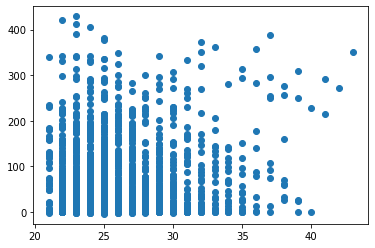

In [16]:
# plotting Age vs Fanduel points for ALL data and positions -- not much to take away because the quarterbacks
plt.scatter(data["Age"], data["FDPt"])
plt.show()

R-squared 0.06280312262549553


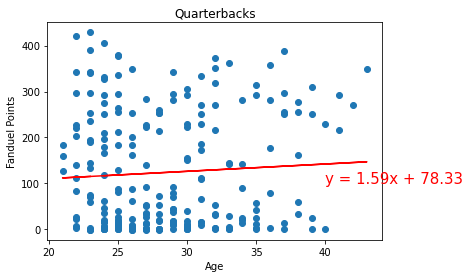

In [17]:
# QB age vs Fanduel points with regression
x = qb["Age"]
y = qb["FDPt"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(40,100),fontsize=15,color="red")
plt.xlabel("Age")
plt.ylabel("Fanduel Points")
plt.title("Quarterbacks")
print(f"R-squared {rvalue}")
plt.show()

R-squared -0.1305720172318621


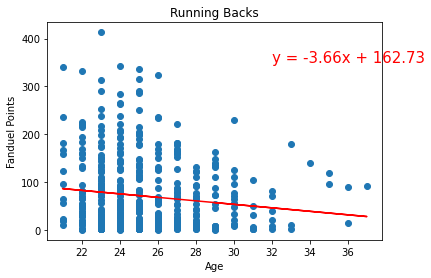

In [18]:
# RB age vs Fanduel points with regression
x = rb["Age"]
y = rb["FDPt"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(32,350),fontsize=15,color="red")
plt.xlabel("Age")
plt.ylabel("Fanduel Points")
plt.title("Running Backs")
print(f"R-squared {rvalue}")
plt.show()

R-squared 0.09211363771637053


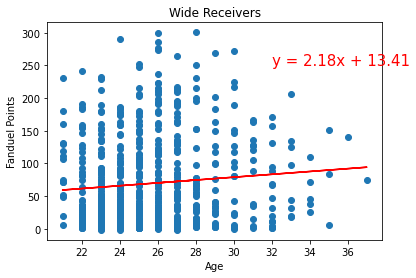

In [19]:
# WR age vs Fanduel points with regression
x = wr["Age"]
y = wr["FDPt"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(32,250),fontsize=15,color="red")
plt.xlabel("Age")
plt.ylabel("Fanduel Points")
plt.title("Wide Receivers")
print(f"R-squared {rvalue}")
plt.show()

R-squared 0.14314021912831185


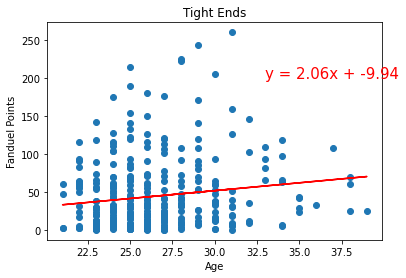

In [20]:
# RB age vs Fanduel points with regression
x = te["Age"]
y = te["FDPt"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(33,200),fontsize=15,color="red")
plt.xlabel("Age")
plt.ylabel("Fanduel Points")
plt.title("Tight Ends")
print(f"R-squared {rvalue}")
plt.show()

R-squared 0.9691400451189677


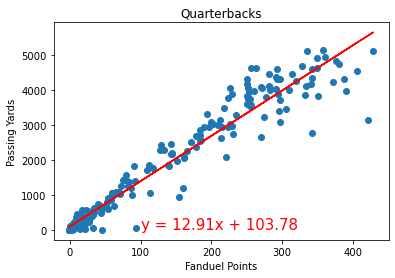

In [21]:
# QB age vs Fanduel points with regression
x = qb["FDPt"]
y = qb["Yds"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(100,15),fontsize=15,color="red")
plt.xlabel("Fanduel Points")
plt.ylabel("Passing Yards")
plt.title("Quarterbacks")
print(f"R-squared {rvalue}")
plt.show()

R-squared 0.6415998626847638


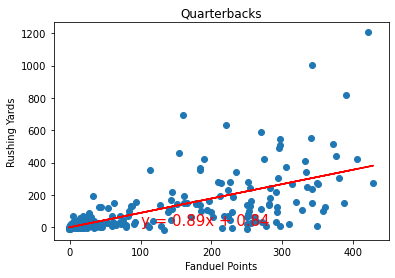

In [22]:
# QB Rush Yards vs Fanduel points with regression
x = qb["FDPt"]
y = qb["Yds.1"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(100,15),fontsize=15,color="red")
plt.xlabel("Fanduel Points")
plt.ylabel("Rushing Yards")
plt.title("Quarterbacks")
print(f"R-squared {rvalue}")
plt.show()

R-squared 0.8312743747308954


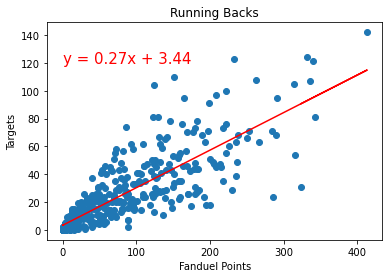

In [23]:
# RB age vs Fanduel points with regression
x = rb["FDPt"]
y = rb["Tgt"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(0,120),fontsize=15,color="red")
plt.xlabel("Fanduel Points")
plt.ylabel("Targets")
plt.title("Running Backs")
print(f"R-squared {rvalue}")
plt.show()

R-squared 0.9206848069725699


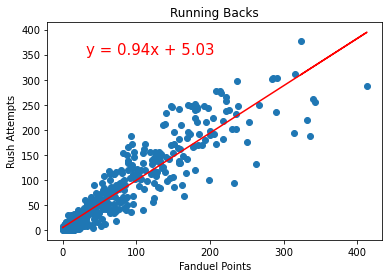

In [24]:
# RB age vs Fanduel points with regression
x = rb["FDPt"]
y = rb["Att.1"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(32,350),fontsize=15,color="red")
plt.xlabel("Fanduel Points")
plt.ylabel("Rush Attempts")
plt.title("Running Backs")
print(f"R-squared {rvalue}")
plt.show()

In [25]:
# create new csv out of 'data' dataframe
data.to_csv("Data/fantasy.csv", index=False, header=True)